# Análise de dados sobre obesidade

## Obesidade 
A obesidade é uma condição médica caracterizada pelo acúmulo excessivo de gordura corporal, que pode ter impactos negativos na saúde. Ela é geralmente definida em termos de índice de massa corporal (IMC), que é calculado dividindo o peso da pessoa pelo quadrado da sua altura (kg/m²). De acordo com a Organização Mundial da Saúde (OMS), um IMC igual ou superior a 30 indica obesidade.

A obesidade é influenciada por uma variedade de fatores, incluindo estilo de vida, genética, ambiente e saúde mental. O tratamento da obesidade geralmente envolve uma combinação de mudanças na dieta, aumento da atividade física, terapia comportamental e, em alguns casos, medicamentos ou cirurgia. A prevenção da obesidade geralmente se concentra em promover estilos de vida saudáveis desde a infância, incluindo alimentação equilibrada e atividade física regular.

Neste contexto, a análise se concentra em dados relacionados à obesidade, uma condição médica globalmente prevalente e de crescente preocupação de saúde pública. Por meio de um banco de dados abrangente, busca-se entender melhor os padrões, tendências e fatores associados à obesidade em diferentes populações.

## Informações do conjunto de dados

Este conjunto de dados contém informações sobre a estimativa dos níveis de obesidade em pessoas dos países México, Peru e Colômbia. Essas estimativas são baseadas nos hábitos alimentares e na condição física dos indivíduos. Os dados consistem em 17 características diferentes e incluem um total de 2111 registros. Cada registro está associado a uma variável de classe chamada NObesity (Nível de Obesidade), que permite classificar os dados de acordo com diferentes categorias de peso: Peso Insuficiente, Peso Normal, Sobrepeso Nível I, Sobrepeso Nível II, Obesidade Tipo I, Obesidade Tipo II e Obesidade Tipo III. Cerca de 77% dos dados foram gerados sinteticamente usando a ferramenta Weka e o filtro SMOTE, enquanto os 23% restantes foram coletados diretamente dos usuários por meio de uma plataforma web.

In [4]:
!pip install pandas

In [5]:
!pip install matplotlib 

In [6]:
import pandas as pd

In [7]:
#importando os dados 

df = pd.read_csv(r"C:\Users\Jessica\OneDrive\Área de Trabalho\ObesityDataSet_raw_and_data_sinthetic.csv")
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## 1. Análise Descritiva
#### Análise descritiva para entender a distribuição das variáveis em relação à idade, gênero e uma visão superficial de quantidade de acordo com diferentes categorias de peso. 

In [9]:
#Mostrar a quantidade de homens e mulheres participantes da pesquisa

homens = df[df['Gender'] == 'Male'].shape[0]
mulheres = df[df['Gender'] == 'Female'].shape[0]

print("Quantidade de Homens:", homens)
print("Quantidade de Mulheres:", mulheres)

Quantidade de Homens: 1068
Quantidade de Mulheres: 1043


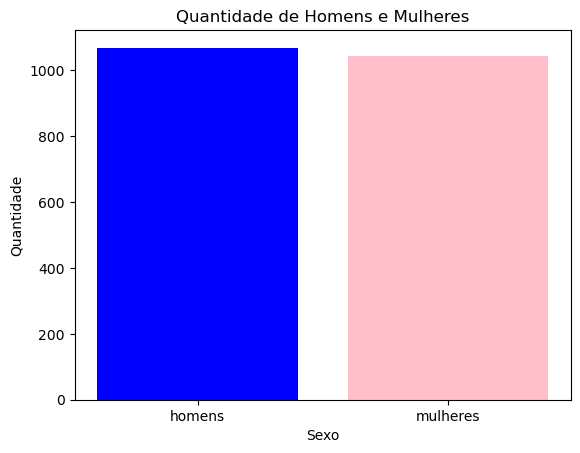

In [10]:
# Quantidades de cada sexo no gráfico

import matplotlib.pyplot as plt

gender = ['homens', 'mulheres']

# Quantidades de cada sexo
quantidades = [homens, mulheres]

plt.bar(gender, quantidades, color=['blue', 'pink'])

plt.title('Quantidade de Homens e Mulheres')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')

plt.show()

In [11]:
# Contar a quantidade 
normal = df[df['NObeyesdad'] == 'Normal_Weight'].shape[0]
primeiro_grau = df[df['NObeyesdad'] == 'Overweight_Level_I'].shape[0]
segundo_grau = df[df['NObeyesdad'] == 'Overweight_Level_II'].shape[0]
obesidade_primeiro = df[df['NObeyesdad'] == 'Obesity_Type_I'].shape[0]
obesidade_segundo = df[df['NObeyesdad'] == 'Obesity_Type_II'].shape[0]
obesidade_terceiro = df[df['NObeyesdad'] == 'Obesity_Type_III'].shape[0]

# Imprimir as quantidades
print("Peso normal:", normal)
print("Sobrepeso nível I:", primeiro_grau)
print("Sobrepeso nível II:", segundo_grau)
print("Obesidade nível 1:", obesidade_primeiro)
print("Obesidade nível 2:", obesidade_segundo)
print("Obesidade nível 3:", obesidade_terceiro)

Peso normal: 287
Sobrepeso nível I: 290
Sobrepeso nível II: 290
Obesidade nível 1: 351
Obesidade nível 2: 297
Obesidade nível 3: 324


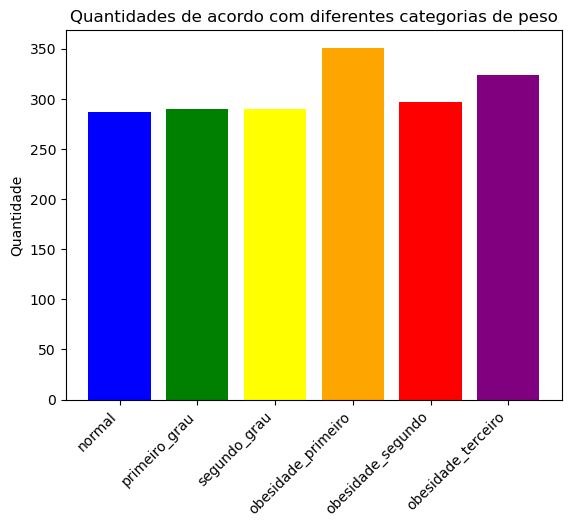

In [41]:
# Quantidades de acordo com diferentes categorias de peso no gráfico

import matplotlib.pyplot as plt

NObeyesdad = ['normal', 'primeiro_grau', 'segundo_grau', 'obesidade_primeiro', 'obesidade_segundo', 'obesidade_terceiro']

# Quantidades de cada sexo
quantidades = [normal, primeiro_grau, segundo_grau, obesidade_primeiro, obesidade_segundo, obesidade_terceiro]

plt.bar(NObeyesdad, quantidades, color=['blue', 'green', 'yellow', 'orange', 'red', 'purple' ])

plt.title('Quantidades de acordo com diferentes categorias de peso')

plt.ylabel('Quantidade')

plt.xticks(rotation=45, ha='right')

plt.show()

TypeError: 'Axes' object is not callable

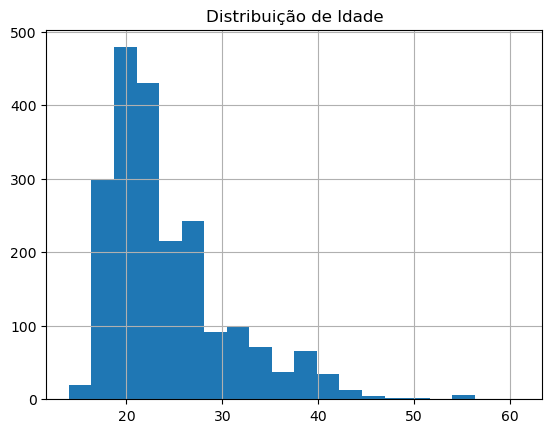

In [42]:
df['Age'].hist(bins=20)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

## 2. Análise de Correlação
#### Correlação entre as variáveis numéricas.

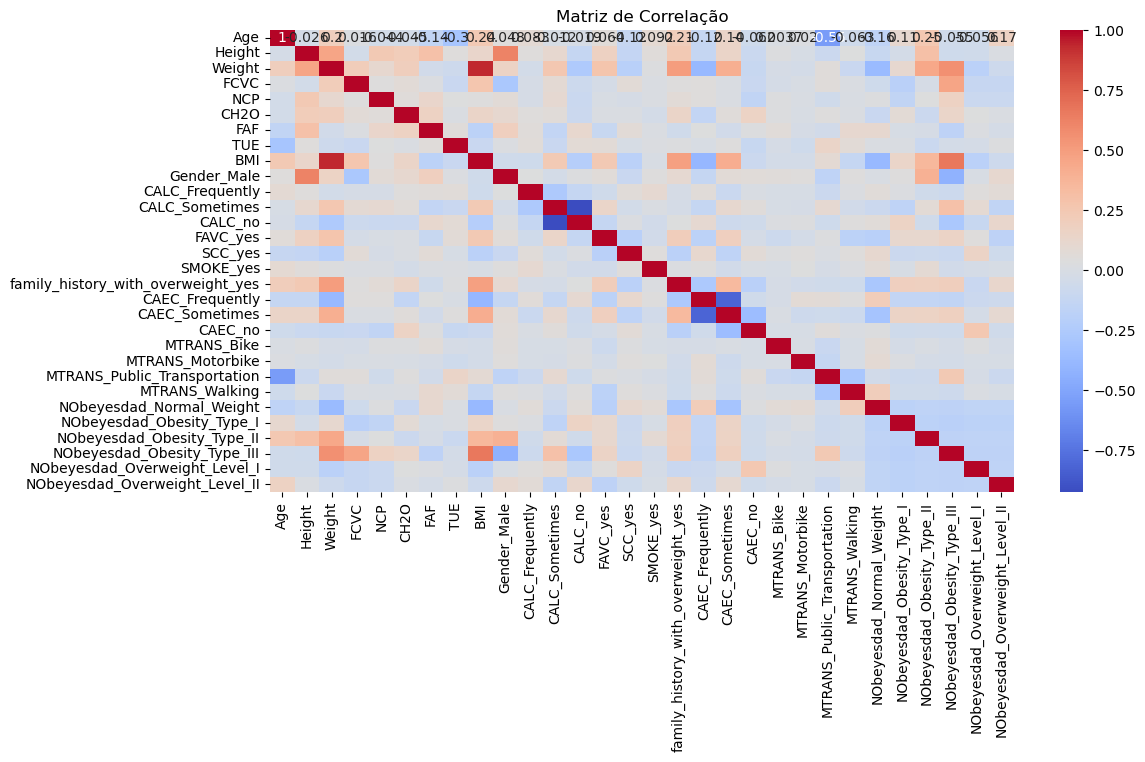

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Converter variáveis categóricas em variáveis dummy
df_dummies = pd.get_dummies(df, drop_first=True)

# Matriz de correlação
plt.figure(figsize=(12, 6))
correlation_matrix = df_dummies.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

## 3. Análise de IMC
#### Analisar o Índice de Massa Corporal (IMC) dos indivíduos por meio do cálculo fornecendo insights sobre a distribuição de peso.

C:\Users\Jessica\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


TypeError: 'Axes' object is not callable

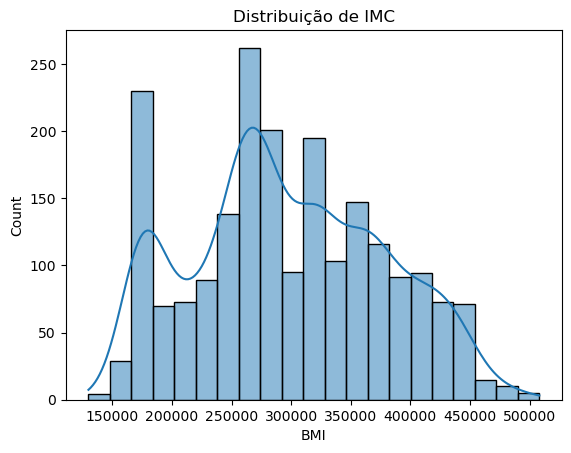

In [45]:
# Calcular IMC
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

# Distribuição de IMC
import seaborn as sns
sns.histplot(df['BMI'], kde=True)
plt.title('Distribuição de IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.show()

# Boxplot de IMC por categoria de peso
sns.boxplot(x='NObeyesdad', y='BMI', data=df)
plt.title('IMC por Categoria de Peso')
plt.xlabel('Categoria de Peso')
plt.ylabel('IMC')
plt.xticks(rotation=45, ha='right')
plt.show()

## 4. Análise de Comportamentos e Hábitos
#### Explorando a relação entre comportamentos/hábitos (como consumo de alimentos, atividade física, etc.) e a obesidade.

TypeError: 'Axes' object is not callable

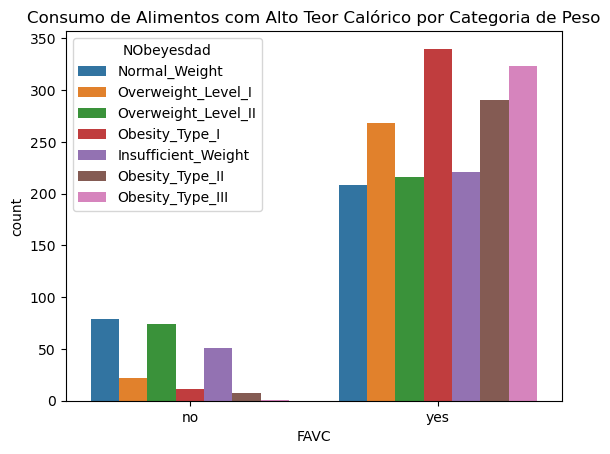

In [49]:
# Consumo de alimentos com alto teor calórico (FAVC)
normal = df[df['NObeyesdad'] == 'Normal_Weight'].shape[0]
primeiro_grau = df[df['NObeyesdad'] == 'Overweight_Level_I'].shape[0]
segundo_grau = df[df['NObeyesdad'] == 'Overweight_Level_II'].shape[0]
obesidade_primeiro = df[df['NObeyesdad'] == 'Obesity_Type_I'].shape[0]
obesidade_segundo = df[df['NObeyesdad'] == 'Obesity_Type_II'].shape[0]
obesidade_terceiro = df[df['NObeyesdad'] == 'Obesity_Type_III'].shape[0]

sns.countplot(x='FAVC', hue='NObeyesdad', data=df)

plt.title('Consumo de Alimentos com Alto Teor Calórico por Categoria de Peso')
plt.xlabel('Consumo de Alimentos com Alto Teor Calórico')
plt.ylabel('Contagem')

plt.show()

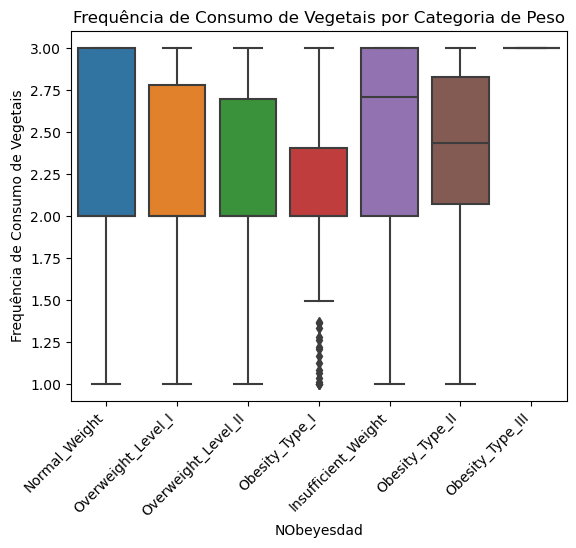

In [52]:
# Frequência de consumo de vegetais (FCVC)
sns.boxplot(x='NObeyesdad', y='FCVC', data=df)
plt.title('Frequência de Consumo de Vegetais por Categoria de Peso')

plt.ylabel('Frequência de Consumo de Vegetais')

plt.xticks(rotation=45, ha='right')

plt.show()

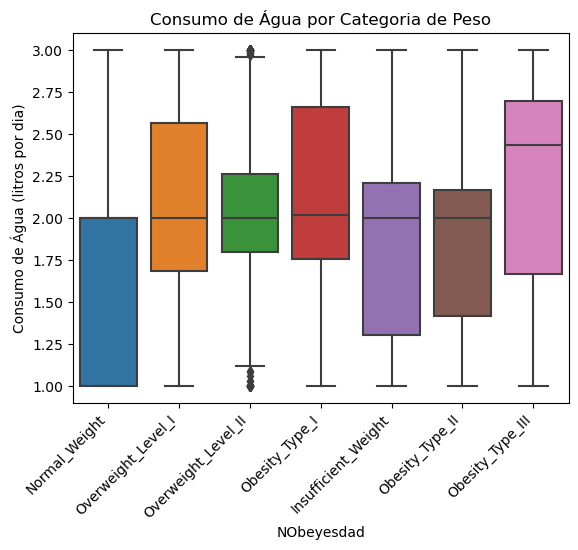

In [63]:
# Consumo de água (CH2O)
sns.boxplot(x='NObeyesdad', y='CH2O', data=df)
plt.title('Consumo de Água por Categoria de Peso')

plt.ylabel('Consumo de Água (litros por dia)')
plt.xticks(rotation=45, ha='right')
plt.show()

TypeError: 'Axes' object is not callable

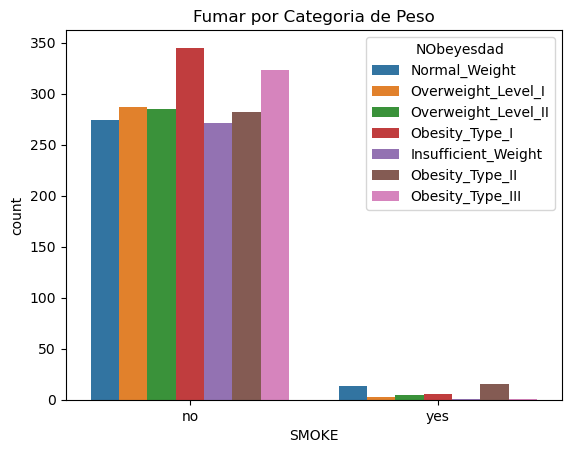

In [66]:
# Fumar por categoria de peso
sns.countplot(x='SMOKE', hue='NObeyesdad', data=df)
plt.title('Fumar por Categoria de Peso')
plt.xlabel('Fumar')
plt.ylabel('Contagem')
plt.show()

TypeError: 'Axes' object is not callable

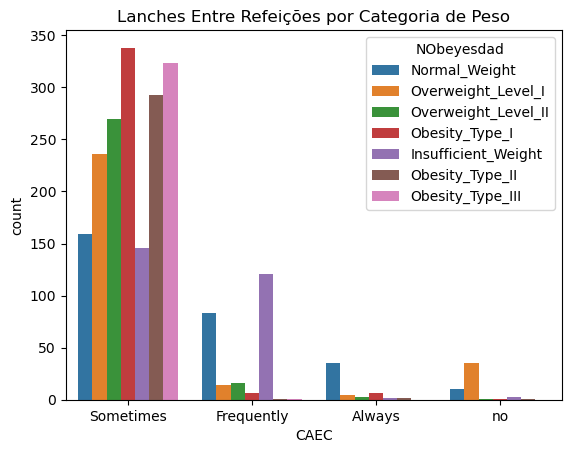

In [67]:
# Lanches entre refeições por categoria de peso
sns.countplot(x='CAEC', hue='NObeyesdad', data=df)
plt.title('Lanches Entre Refeições por Categoria de Peso')
plt.xlabel('Lanches Entre Refeições')
plt.ylabel('Contagem')
plt.show()

TypeError: 'Axes' object is not callable

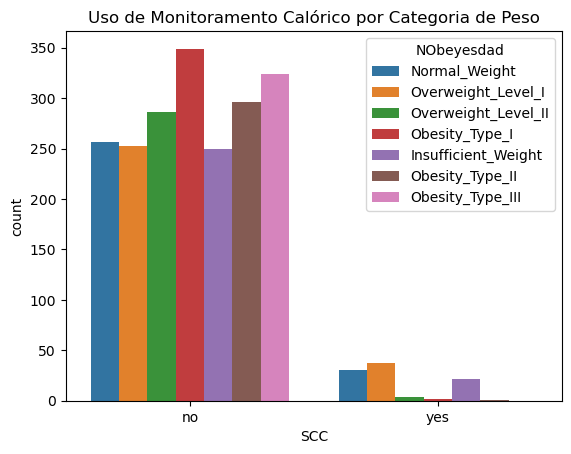

In [68]:
# Uso de monitoramento calórico por categoria de peso
sns.countplot(x='SCC', hue='NObeyesdad', data=df)
plt.title('Uso de Monitoramento Calórico por Categoria de Peso')
plt.xlabel('Uso de Monitoramento Calórico')
plt.ylabel('Contagem')
plt.show()

TypeError: 'Axes' object is not callable

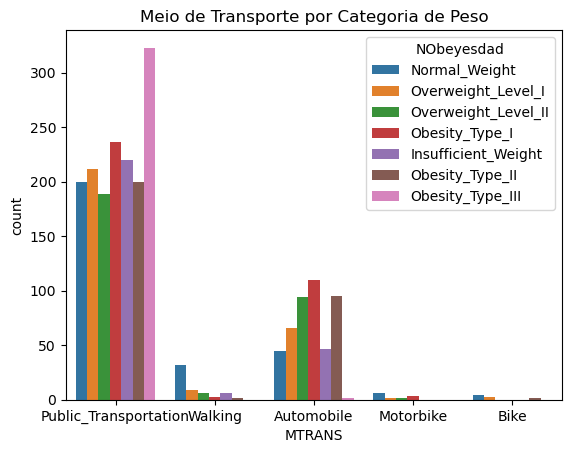

In [69]:
# Meio de transporte por categoria de peso
sns.countplot(x='MTRANS', hue='NObeyesdad', data=df)
plt.title('Meio de Transporte por Categoria de Peso')
plt.xlabel('Meio de Transporte')
plt.ylabel('Contagem')
plt.show()

TypeError: 'Axes' object is not callable

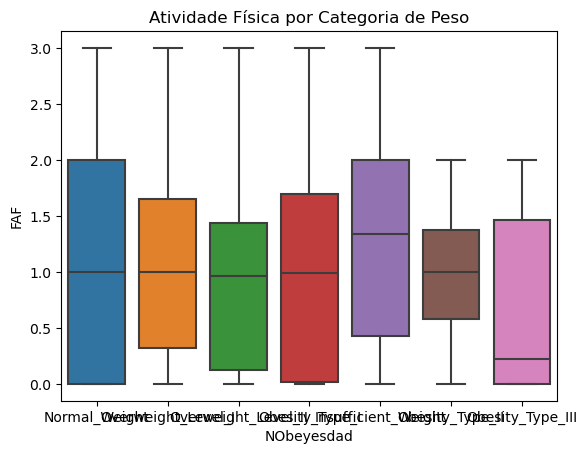

In [54]:
# Atividade física (FAF)
sns.boxplot(x='NObeyesdad', y='FAF', data=df)
plt.title('Atividade Física por Categoria de Peso')
plt.xlabel('Categoria de Peso')
plt.ylabel('Frequência de Atividade Física (vezes por semana)')
plt.xticks(rotation=45, ha='right')
plt.show()

## 5. Análise de Histórico Familiar
##### Explorando a relação entre o histórico familiar de sobrepeso e a obesidade.

TypeError: 'Axes' object is not callable

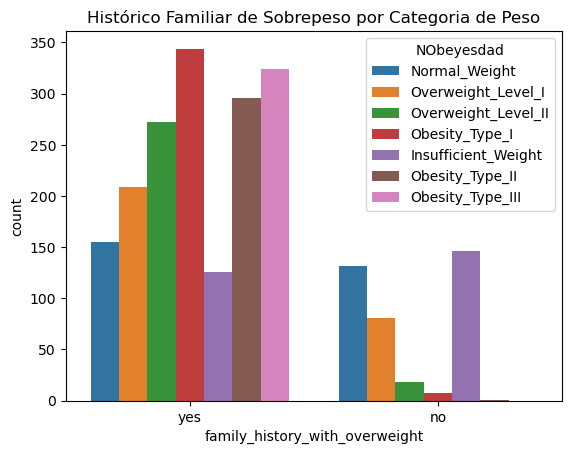

In [64]:
sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=df)
plt.title('Histórico Familiar de Sobrepeso por Categoria de Peso')
plt.xlabel('Histórico Familiar de Sobrepeso')
plt.ylabel('Contagem')
plt.show()

## 6. Modelagem Preditiva
#### Construindo um modelo preditivo para prever a categoria de peso (NObeyesdad) com base nas outras variáveis.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Preparar os dados para modelagem
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Converter variáveis categóricas em variáveis dummy
X = pd.get_dummies(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Fazer previsões
y_pred = clf.predict(X_test)

# Avaliar o modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56  0  0  0  0  0  0]
 [ 1 60  0  0  0  1  0]
 [ 0  0 78  0  0  0  0]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  3  0  0  0 53  0]
 [ 0  0  0  0  0  1 49]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      1.00      0.99        56
      Normal_Weight       0.95      0.97      0.96        62
     Obesity_Type_I       0.99      1.00      0.99        78
    Obesity_Type_II       1.00      0.98      0.99        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.96      0.95      0.95        56
Overweight_Level_II       1.00      0.98      0.99        50

           accuracy                           0.98       423
          macro avg       0.98      0.98      0.98       423
       weighted avg       0.98      0.98      0.98       423

